In [1]:
import pandas as pd
import numpy as np
import shap
import lime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

c:\Users\Piyush\.conda\envs\myml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Assume 'data' is your full DataFrame
df = pd.read_csv("dataset_train_target_191_v5.csv")

In [3]:
df

,smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,TYRO3,ULK1,ULK3,VGFR1,VGFR2,VGFR3,WEE1,YES,ZAP70,Activity
0,CC(=O)Nc1nccc(c2ccc(OCC(N)CC(C)C)c(C)c2)c1,11.175565,11.175565,0.041192,-0.136745,0.803514,12.080000,341.455,314.239,341.210327,...,0,0,0,0,0,0,0,0,0,1
1,CC(C)CC(C)(N)COc1ccc(c2ccnc3ccccc23)cc1C1CC1,6.458574,6.458574,0.310555,-0.310555,0.558106,16.321429,374.528,344.288,374.235814,...,0,0,0,0,0,0,0,0,0,1
2,CC(C)CC(C)(N)COc1ccc(c2nc(C(C)C)ncc2)cc1F,14.423366,14.423366,0.210482,-0.487997,0.799608,13.960000,345.462,317.238,345.221641,...,0,0,0,0,0,0,0,0,0,1
3,CC(C)CC(C)(N)COc1ncc(c2ccnc3ccccc23)cc1C(F)F,13.703593,13.703593,0.071720,-2.703999,0.593337,13.857143,385.458,360.258,385.196569,...,0,0,0,0,0,0,0,0,0,1
4,Cc1cc(c2ccc(OCC(C)(N)CC(C)C)c(S(=O)(=O)C)c2)ccn1,12.282857,12.282857,0.171122,-3.446282,0.798179,14.269231,376.522,348.298,376.182064,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425945,Clc1ccc(Nc2nnc(Cc3ccncc3)c3c2cccc3)cc1,5.947311,5.947311,0.702955,0.702955,0.563825,10.760000,346.821,331.701,346.098524,...,0,0,0,0,0,0,0,0,1,0
425946,COC1C(N(C)C(=O)c2ccccc2)CC2OC1(C)n1c3c(cccc3)c...,13.882905,13.882905,0.044612,-0.979914,0.287218,24.162791,570.649,540.409,570.226705,...,0,0,0,0,0,0,0,0,1,0
425947,C#Cc1cc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)ccc1,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,...,0,0,0,0,0,0,0,0,1,0
425948,CC12OC(CC1(O)CO)n1c3ccccc3c3c4C(=O)NCc4c4c5c(c...,13.163771,13.163771,0.055524,-1.477323,0.373216,27.848485,439.471,418.303,439.153206,...,0,0,0,0,0,0,0,0,1,1


In [4]:
list(df.columns.values)

['smiles',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 '

In [5]:
# Split the dataset into features (X) and labels (y)
X = df.iloc[:, 1:-1] #rdkit descriptors aka features and protein one hot encode and activity
y = df["Activity"]

In [6]:
list(X.columns.values)

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [7]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(X).sum().sum())
print("Infinite values:", np.isinf(X).sum().sum())
print("Large values:", np.any(np.abs(X) > 1e10))

NaN values: 1320
Infinite values: 90
Large values: True


In [9]:
#Handle NaN and Inf values if found
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Replace NaNs with column means

In [10]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(X).sum().sum())
print("Infinite values:", np.isinf(X).sum().sum())
print("Large values:", np.any(np.abs(X) > 1e10))

NaN values: 0
Infinite values: 0
Large values: True


In [11]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(y).sum().sum())
print("Infinite values:", np.isinf(y).sum().sum())
print("Large values:", np.any(np.abs(y) > 1e10))

NaN values: 0
Infinite values: 0
Large values: False


In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
print("Large values X_train_scaled:", np.any(np.abs(X_train_scaled) > 1e10))
print("Large values X_test_scaled:", np.any(np.abs(X_test_scaled) > 1e10))

Large values X_train_scaled: False
Large values X_test_scaled: False


In [16]:
X.count()

MaxAbsEStateIndex    425950
MaxEStateIndex       425950
MinAbsEStateIndex    425950
MinEStateIndex       425950
qed                  425950
                      ...  
VGFR2                425950
VGFR3                425950
WEE1                 425950
YES                  425950
ZAP70                425950
Length: 401, dtype: int64

In [17]:
# Input layer
input_layer = Input(shape=(401,))

In [18]:
# Shared layers
shared_layer = Dense(128, activation='relu')(input_layer)
shared_layer = Dense(64, activation='relu')(shared_layer)

In [19]:
# Activity prediction output
y_pred = Dense(1, activation='sigmoid', name='y_pred')(shared_layer)

In [20]:
# Define model
model = Model(inputs=input_layer, outputs=y_pred)

In [21]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss={'y_pred': 'binary_crossentropy'},
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(X_train_scaled, 
                    {'y_pred': y_train},
                    validation_data=(X_test_scaled, {'y_pred': y_test}),
                    epochs=20, batch_size=32)


Epoch 1/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7072 - loss: 0.5627 - val_accuracy: 0.7798 - val_loss: 0.4652
Epoch 2/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7966 - loss: 0.4389 - val_accuracy: 0.8052 - val_loss: 0.4251
Epoch 3/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8189 - loss: 0.4011 - val_accuracy: 0.8184 - val_loss: 0.4022
Epoch 4/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8341 - loss: 0.3736 - val_accuracy: 0.8264 - val_loss: 0.3880
Epoch 5/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8453 - loss: 0.3535 - val_accuracy: 0.8307 - val_loss: 0.3804
Epoch 6/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8517 - loss: 0.3395 - val_accuracy: 0.8373 - val_loss: 0.3706
Epoch 7/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8587 - loss: 0.3273 - val_accuracy: 0.8417 - val_loss: 0.3635
Epoch 8/20
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 

In [23]:
# Evaluate the model on the test data
results = model.evaluate(X_test_scaled, 
                         {'y_pred': y_test})

# Unpack the results
activity_loss = results[0]
activity_accuracy = results[1]

print(f"Activity Loss: {activity_loss}, Activity Accuracy: {activity_accuracy}")


2663/2663 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8569 - loss: 0.3452
Activity Loss: 0.3413165509700775, Activity Accuracy: 0.8596783876419067


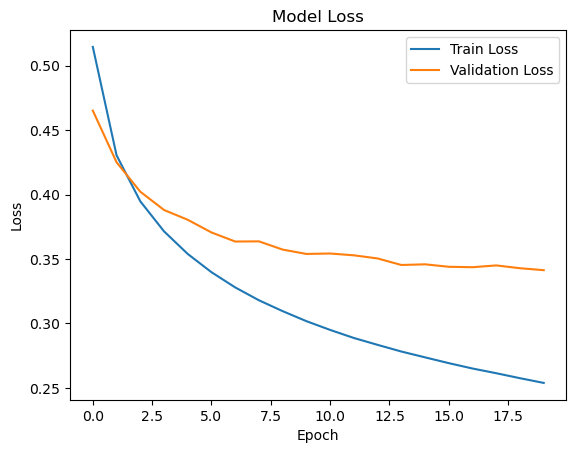

In [24]:
# Plot training & validation loss for both outputs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [25]:
list(history.history)

['accuracy', 'loss', 'val_accuracy', 'val_loss']

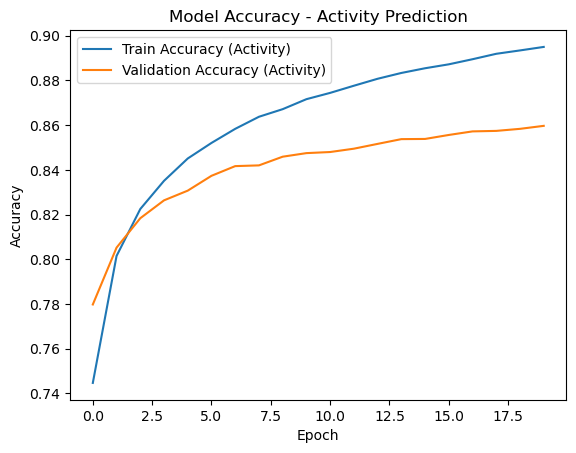

In [26]:
# Plot accuracy for activity prediction
plt.plot(history.history['accuracy'], label='Train Accuracy (Activity)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Activity)')
plt.title('Model Accuracy - Activity Prediction')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [27]:
# Get weights from the first dense layer
layer_weights = model.layers[1].get_weights()[0]  # First hidden layer weights
feature_importance = np.mean(np.abs(layer_weights), axis=1)  # Mean absolute weight per feature

# Sort and display top features
sorted_indices = feature_importance.argsort()[::-1]
for i in sorted_indices[:20]:  # Top 10 features
    print(f"{X.columns[i]}: {feature_importance[i]}")

EGFR: 0.11437416821718216
fr_pyridine: 0.11077669262886047
fr_imidazole: 0.11020109057426453
MK14: 0.10898604989051819
fr_ArN: 0.1019294261932373
CHK1: 0.10161375999450684
SMR_VSA9: 0.10149116814136505
BRAF: 0.1012292355298996
fr_priamide: 0.09999704360961914
AKT1: 0.09972831606864929
PIM1: 0.09954509139060974
CDK2: 0.0985228642821312
BalabanJ: 0.097986601293087
BCUT2D_LOGPHI: 0.09791635721921921
fr_bicyclic: 0.09694388508796692
MTOR: 0.09671834856271744
fr_imide: 0.09630601108074188
PEOE_VSA4: 0.0951443538069725
BCUT2D_MWLOW: 0.09476187825202942
PEOE_VSA2: 0.09457798302173615


In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 401)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_pred (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,333 (700.52 KB)

 Trainable params: 59,777 (233.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 119,556 (467.02 KB)